# Notes

Based on the features derived from our pretrained model, we are implementing a linear probing method for fine-tuning. In this example, our model's performance will be evaluated using a `leave-one-cohort-out` test approach. This method involves systematically excluding each cohort from training and using it as a test set, thereby providing a comprehensive assessment of the model's generalization capabilities across different cohorts.

In [3]:
import sys
sys.path.insert(0, '/home/was966/Research/mims-responder/')
from responder.utils import plot_embed_with_label, score
from responder import PreTrainer, FineTuner, loadresponder

In [5]:
import os
from tqdm import tqdm
from itertools import chain
import pandas as pd
import numpy as np
import random, torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

def onehot(S):
    assert type(S) == pd.Series, 'Input type should be pd.Series'
    dfd = pd.get_dummies(S, dummy_na=True)
    nanidx = dfd[dfd[np.nan]].index
    dfd.loc[nanidx, :] = np.nan
    dfd = dfd.drop(columns=[np.nan])*1.
    cols = dfd.sum().sort_values(ascending=False).index.tolist()
    dfd = dfd[cols]
    return dfd

In [15]:
# load the pretrained model as a feature extractor
pretrainer = loadresponder('./results/Pretrain_ssl_notask_20240111_174630/pretrainer.pt')
pretrainer.count_parameters()

79696

In [9]:
data_path = '../data/'
from responder.utils import plot_embed_with_label, score
skcm_df_label = pd.read_pickle(os.path.join(data_path, 'SKCM','PATIENT.ITRP.TABLE'))
skcm_df_tpm = pd.read_pickle(os.path.join(data_path, 'SKCM','TPM.ITRP.TABLE'))
skcm_df_task = onehot(skcm_df_label.response_label)

In [11]:
skcm_df_task.head()

,NR,R
Patient100_T_P,0.0,1.0
Patient102_T_P,0.0,1.0
Patient105_T_P,0.0,1.0
Patient106_T_P,0.0,1.0
Patient10_T_M,0.0,1.0


Load: inputencoder.embedder.abundance_embedder.layers.0.weight
Load: inputencoder.embedder.abundance_embedder.layers.0.bias
Load: inputencoder.encoder.layers.0.self_attn.in_proj_weight
Load: inputencoder.encoder.layers.0.self_attn.in_proj_bias
Load: inputencoder.encoder.layers.0.self_attn.out_proj.weight
Load: inputencoder.encoder.layers.0.self_attn.out_proj.bias
Load: inputencoder.encoder.layers.0.linear1.weight
Load: inputencoder.encoder.layers.0.linear1.bias
Load: inputencoder.encoder.layers.0.linear2.weight
Load: inputencoder.encoder.layers.0.linear2.bias
Load: inputencoder.encoder.layers.0.norm1.weight
Load: inputencoder.encoder.layers.0.norm1.bias
Load: inputencoder.encoder.layers.0.norm2.weight
Load: inputencoder.encoder.layers.0.norm2.bias
Load: latentprojector.genesetprojector.geneset_aggregator.aggregator.attention_weights.geneset_0
Load: latentprojector.genesetprojector.geneset_aggregator.aggregator.attention_weights.geneset_1
Load: latentprojector.genesetprojector.geneset_a

100%|##########| 7/7 [00:00<00:00, 18.91it/s]


TEST-COHORT: Liu, Training:227, Test:107
            roc       prc        f1       acc
Train  0.899321  0.796504  0.814070  0.837004
Test   0.608278  0.514149  0.426667  0.598131
Saving the model to ./FinetuneResults/Finetune_Liu_20240111_181238/finetuner.pt
Load: inputencoder.embedder.abundance_embedder.layers.0.weight
Load: inputencoder.embedder.abundance_embedder.layers.0.bias
Load: inputencoder.encoder.layers.0.self_attn.in_proj_weight
Load: inputencoder.encoder.layers.0.self_attn.in_proj_bias
Load: inputencoder.encoder.layers.0.self_attn.out_proj.weight
Load: inputencoder.encoder.layers.0.self_attn.out_proj.bias
Load: inputencoder.encoder.layers.0.linear1.weight
Load: inputencoder.encoder.layers.0.linear1.bias
Load: inputencoder.encoder.layers.0.linear2.weight
Load: inputencoder.encoder.layers.0.linear2.bias
Load: inputencoder.encoder.layers.0.norm1.weight
Load: inputencoder.encoder.layers.0.norm1.bias
Load: inputencoder.encoder.layers.0.norm2.weight
Load: inputencoder.encoder.lay

100%|##########| 2/2 [00:00<00:00,  9.54it/s]


TEST-COHORT: Hugo, Training:308, Test:26
            roc       prc        f1       acc
Train  0.843087  0.694994  0.729097  0.737013
Test   0.636905  0.640437  0.642857  0.615385
Saving the model to ./FinetuneResults/Finetune_Hugo_20240111_181301/finetuner.pt
Load: inputencoder.embedder.abundance_embedder.layers.0.weight
Load: inputencoder.embedder.abundance_embedder.layers.0.bias
Load: inputencoder.encoder.layers.0.self_attn.in_proj_weight
Load: inputencoder.encoder.layers.0.self_attn.in_proj_bias
Load: inputencoder.encoder.layers.0.self_attn.out_proj.weight
Load: inputencoder.encoder.layers.0.self_attn.out_proj.bias
Load: inputencoder.encoder.layers.0.linear1.weight
Load: inputencoder.encoder.layers.0.linear1.bias
Load: inputencoder.encoder.layers.0.linear2.weight
Load: inputencoder.encoder.layers.0.linear2.bias
Load: inputencoder.encoder.layers.0.norm1.weight
Load: inputencoder.encoder.layers.0.norm1.bias
Load: inputencoder.encoder.layers.0.norm2.weight
Load: inputencoder.encoder.la

100%|##########| 4/4 [00:00<00:00, 10.36it/s]


TEST-COHORT: Riaz, Training:283, Test:51
            roc       prc        f1       acc
Train  0.833215  0.713808  0.756757  0.745583
Test   0.621951  0.250921  0.333333  0.607843
Saving the model to ./FinetuneResults/Finetune_Riaz_20240111_181329/finetuner.pt
Load: inputencoder.embedder.abundance_embedder.layers.0.weight
Load: inputencoder.embedder.abundance_embedder.layers.0.bias
Load: inputencoder.encoder.layers.0.self_attn.in_proj_weight
Load: inputencoder.encoder.layers.0.self_attn.in_proj_bias
Load: inputencoder.encoder.layers.0.self_attn.out_proj.weight
Load: inputencoder.encoder.layers.0.self_attn.out_proj.bias
Load: inputencoder.encoder.layers.0.linear1.weight
Load: inputencoder.encoder.layers.0.linear1.bias
Load: inputencoder.encoder.layers.0.linear2.weight
Load: inputencoder.encoder.layers.0.linear2.bias
Load: inputencoder.encoder.layers.0.norm1.weight
Load: inputencoder.encoder.layers.0.norm1.bias
Load: inputencoder.encoder.layers.0.norm2.weight
Load: inputencoder.encoder.la

100%|##########| 5/5 [00:00<00:00, 14.29it/s]


TEST-COHORT: Gide, Training:261, Test:73
            roc       prc        f1       acc
Train  0.863262  0.706675  0.682353  0.689655
Test   0.709848  0.738944  0.741573  0.684932
Saving the model to ./FinetuneResults/Finetune_Gide_20240111_181355/finetuner.pt
Load: inputencoder.embedder.abundance_embedder.layers.0.weight
Load: inputencoder.embedder.abundance_embedder.layers.0.bias
Load: inputencoder.encoder.layers.0.self_attn.in_proj_weight
Load: inputencoder.encoder.layers.0.self_attn.in_proj_bias
Load: inputencoder.encoder.layers.0.self_attn.out_proj.weight
Load: inputencoder.encoder.layers.0.self_attn.out_proj.bias
Load: inputencoder.encoder.layers.0.linear1.weight
Load: inputencoder.encoder.layers.0.linear1.bias
Load: inputencoder.encoder.layers.0.linear2.weight
Load: inputencoder.encoder.layers.0.linear2.bias
Load: inputencoder.encoder.layers.0.norm1.weight
Load: inputencoder.encoder.layers.0.norm1.bias
Load: inputencoder.encoder.layers.0.norm2.weight
Load: inputencoder.encoder.la

100%|##########| 3/3 [00:00<00:00, 12.50it/s]


TEST-COHORT: Allen, Training:295, Test:39
            roc       prc        f1       acc
Train  0.857000  0.750105  0.726496  0.783051
Test   0.757396  0.543362  0.647059  0.692308
Saving the model to ./FinetuneResults/Finetune_Allen_20240111_181421/finetuner.pt
Load: inputencoder.embedder.abundance_embedder.layers.0.weight
Load: inputencoder.embedder.abundance_embedder.layers.0.bias
Load: inputencoder.encoder.layers.0.self_attn.in_proj_weight
Load: inputencoder.encoder.layers.0.self_attn.in_proj_bias
Load: inputencoder.encoder.layers.0.self_attn.out_proj.weight
Load: inputencoder.encoder.layers.0.self_attn.out_proj.bias
Load: inputencoder.encoder.layers.0.linear1.weight
Load: inputencoder.encoder.layers.0.linear1.bias
Load: inputencoder.encoder.layers.0.linear2.weight
Load: inputencoder.encoder.layers.0.linear2.bias
Load: inputencoder.encoder.layers.0.norm1.weight
Load: inputencoder.encoder.layers.0.norm1.bias
Load: inputencoder.encoder.layers.0.norm2.weight
Load: inputencoder.encoder.

100%|##########| 3/3 [00:00<00:00, 10.91it/s]


TEST-COHORT: MGH, Training:296, Test:38
            roc       prc        f1       acc
Train  0.877261  0.749037  0.788104  0.807432
Test   0.752976  0.654694  0.600000  0.578947
Saving the model to ./FinetuneResults/Finetune_MGH_20240111_181448/finetuner.pt


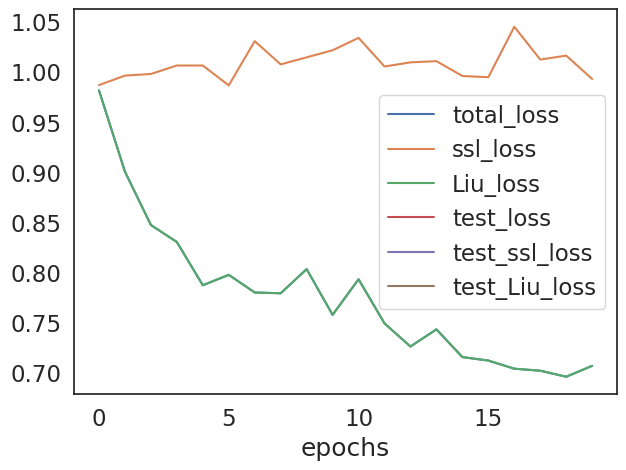

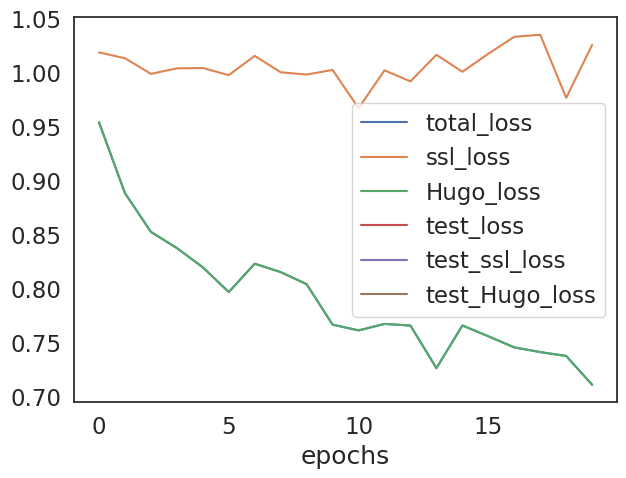

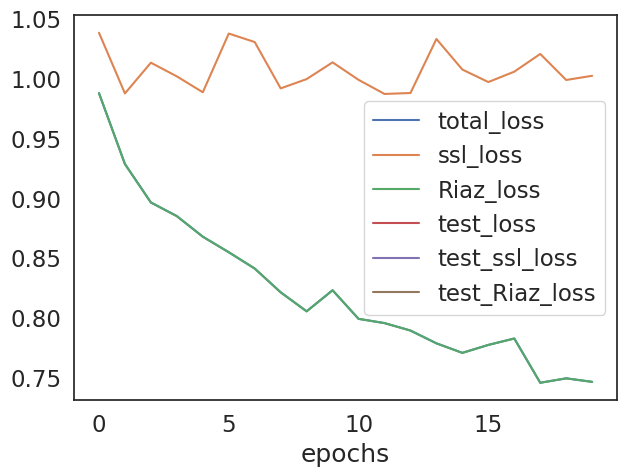

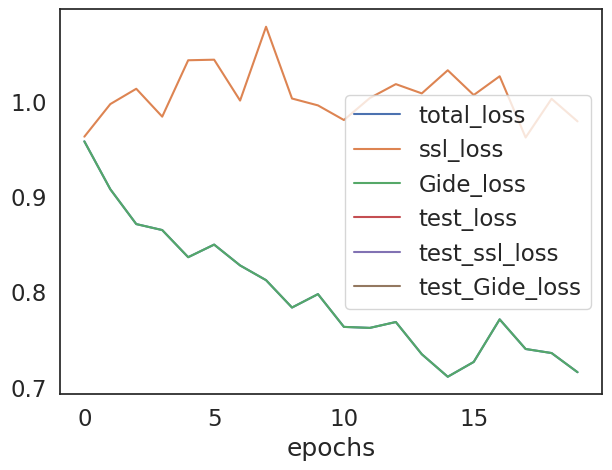

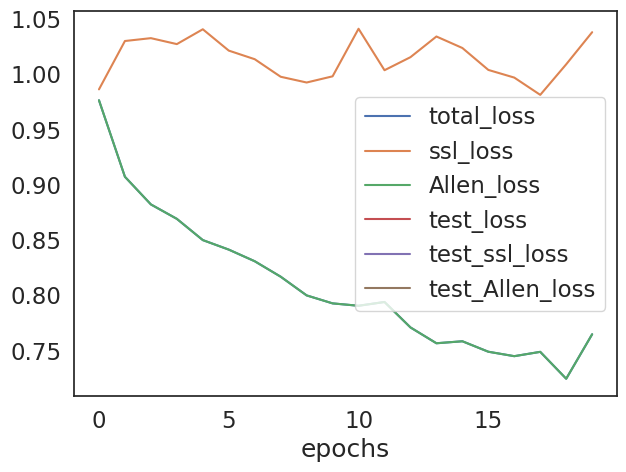

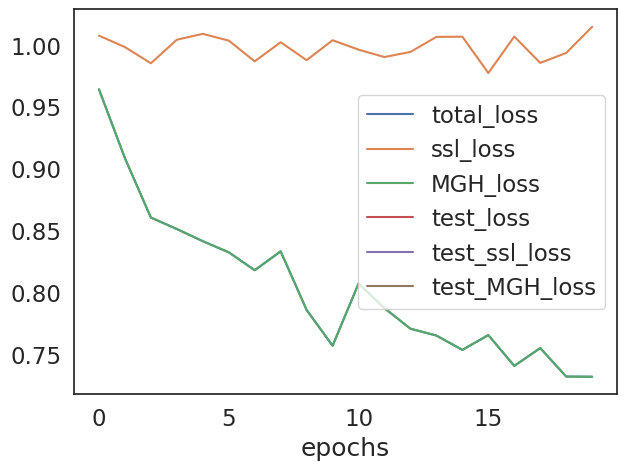

In [19]:
cohort_list = ['Gide', 'Allen', 'MGH','Liu', 'Hugo', 'Riaz']

params = {'mode': 'head',
            'lr': 1e-2,
            'device':'cuda',
            'weight_decay': 1e-4,
            'batch_size':16,
            'epochs': 20,
            'task_dense_layer': [24], 
            'with_wandb': False,
            'verbose': True}


res = []
for cohort_name in cohort_list:
    test_idx = skcm_df_label[skcm_df_label.cohort == cohort_name].index
    train_idx = skcm_df_label[~skcm_df_label.index.isin(test_idx)].index
    
    train_X = skcm_df_tpm.loc[train_idx]
    train_y = skcm_df_task.loc[train_idx]
    test_X = skcm_df_tpm.loc[test_idx]    
    test_y = skcm_df_task.loc[test_idx]
    pretrainer = pretrainer.copy()
    finetuner = FineTuner(pretrainer, **params, work_dir= './results')

    finetuner.tune(df_tpm_train = train_X,
                   df_task_train = train_y,
                   task_name=cohort_name,
                   task_type='c',
                    )

    _, pred_trainy = finetuner.predict(train_X, batch_size = 16)
    _, pred_testy = finetuner.predict(test_X, batch_size = 16)
    s1 = score(train_y['R'], pred_trainy[1], pred_trainy.idxmax(axis=1))
    s2 = score(test_y['R'], pred_testy[1], pred_testy.idxmax(axis=1))
    dfs = pd.DataFrame([s1, s2], columns = ['roc', 'prc', 'f1', 'acc'], index = ['Train', 'Test'])
    #finetuner.wandb.log({cohort_name:dfs.to_dict()})
    print('TEST-COHORT: %s, Training:%s, Test:%s' % (cohort_name, len(train_idx), len(test_idx)))
    print(dfs)

    res.append(dfs)
    if finetuner.with_wandb:
        finetuner.wandb.log(dfs.to_dict())
    finetuner.close()

dftest = pd.concat(res).loc['Test']
dftest.index = cohort_list
dftest.index.name= 'Cohort'

In [20]:
dftest

,roc,prc,f1,acc
Cohort,,,,
Liu,0.608278,0.514149,0.426667,0.598131
Hugo,0.636905,0.640437,0.642857,0.615385
Riaz,0.621951,0.250921,0.333333,0.607843
Gide,0.709848,0.738944,0.741573,0.684932
Allen,0.757396,0.543362,0.647059,0.692308
MGH,0.752976,0.654694,0.600000,0.578947


In [21]:
dftest.mean()

roc    0.681226
prc    0.557084
f1     0.565248
acc    0.629591
dtype: float64

In [22]:
finetuner.count_parameters()

890